In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp
import time 
from inference.infer import PoseDetector, ActionClassifier

In [2]:
pose = PoseDetector()
ac = ActionClassifier()

In [18]:
# Only one image
r_dix = np.random.randint(0, 500)
dir_ = '../data_folder/bufs/' + str(r_dix) + '.jpg'
r_im = cv2.cvtColor(cv2.imread(dir_), cv2.COLOR_BGR2RGB)
pose_obj = pose.trk_process(image=r_im)
pose.get_coordis_3d(pose_obj)
landmarks = ['nose', 'right_ear']
ac.update_information(action='address',
                      landmarks=landmarks,
                      pose_coordis=pose.coordinates,
                      num_frame=140, image=r_im)
# ac.esti_inform['address']

In [3]:
# Image files
start = time.perf_counter()
for action in ['address', 'backswing', 'top', 'follow', 'impact']:
    for i in range(0, 514):
        dir_ = '../data_folder/bufs/' + str(i) + '.jpg'
        r_img = cv2.cvtColor(cv2.imread(dir_), cv2.COLOR_BGR2RGB)
        
        pose_obj = pose.trk_process(image=r_img)
        pose.get_coordis_3d(pose_obj)
        landmarked_img = pose.drawing_with_pose(r_img, pose_obj)
        landmarks = ['left_shoulder', 'right_shoulder', 
                    'left_hip', 'right_hip', 
                    'left_elbow', 'right_elbow',
                    'left_wrist', 'right_wrist',
                    'left_knee', 'right_knee']
        ac.update_information(action=action,
                              landmarks=landmarks,
                              pose_coordis=pose.coordinates,
                              num_frame=i, image=landmarked_img)
print(time.perf_counter() - start)

104.54421240000374


In [58]:
ac.restet_inform()

In [59]:
# for videos
si = {}
actions = ['address', 'backswing', 'top', 'follow', 'impact']
# actions = ['backswing']
for action in actions:
    a = []
    video = cv2.VideoCapture('../data_folder/src/가볍게 치는 좋은 스윙 슬로우모션(GOLF SWING KLPGA).mp4')
    while video.isOpened():
        read_ok, frame = video.read()
        if not read_ok:
            print('TRK Complete!')
            break
        cnt = video.get(cv2.CAP_PROP_POS_FRAMES)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, dsize=(0, 0), fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
        pose_obj = pose.trk_process(image=frame)
        pose.get_coordis_3d(pose_obj)
        landmarked_img = pose.drawing_with_pose(frame, pose_obj)
        landmarks = ['left_elbow', 'right_elbow', 'left_wrist', 'right_wrist']
        dir_ = '../data_folder/bufs/label_land/' + str(cnt) + '.jpg'
        cv2.imwrite(dir_, landmarked_img)
        ac.update_information(action=action,
                              landmarks=landmarks,
                              pose_coordis=pose.coordinates,
                              num_frame=cnt, image=landmarked_img)
        a.append(ac.a)
    si[action] = a

TRK Complete!
TRK Complete!
TRK Complete!
TRK Complete!
TRK Complete!


In [13]:
ac.esti_inform['address']['image'].shape

(2880, 1620, 3)

1.0


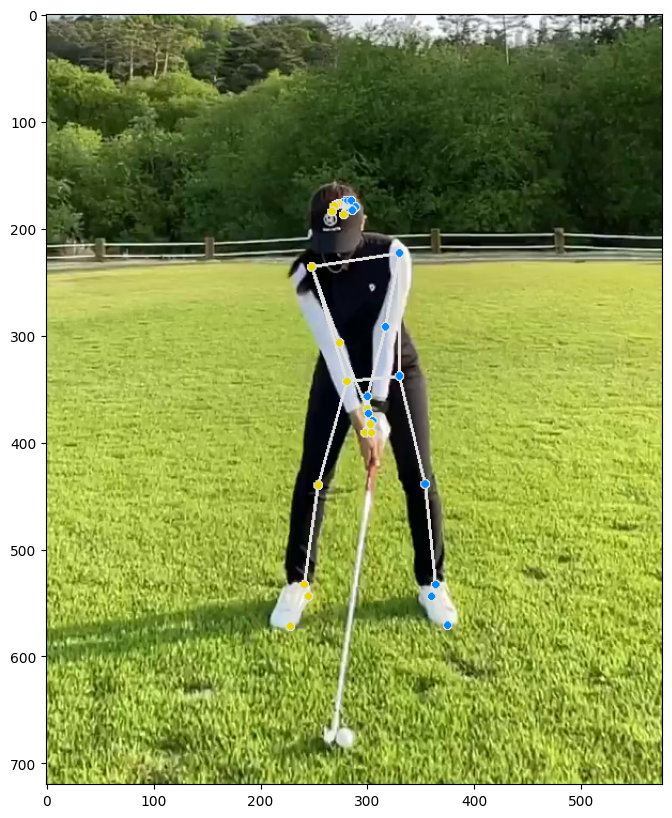

In [57]:
print(ac.esti_inform['impact']['frame'])
plt.figure(figsize=(10,10))
plt.imshow(ac.esti_inform['impact']['image'])

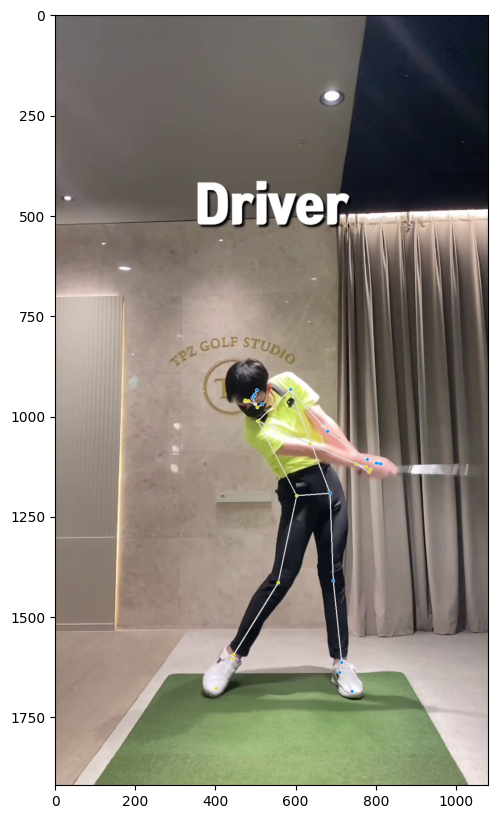

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(ac.esti_inform['follow']['image'])

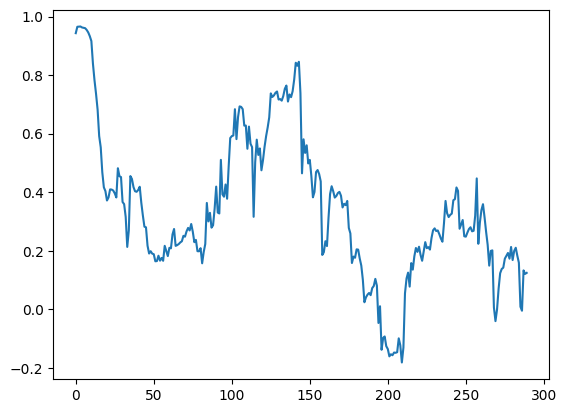

In [49]:
plt.plot(si['address'])

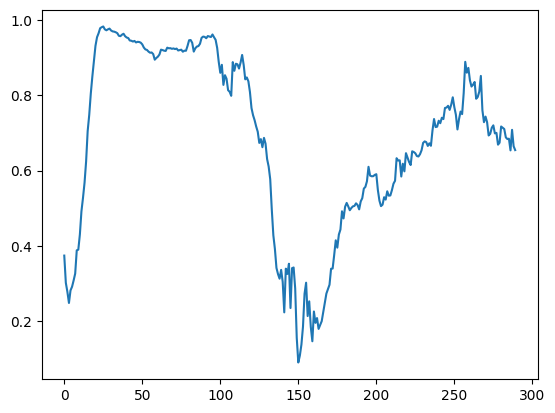

In [50]:
plt.plot(si['backswing'])

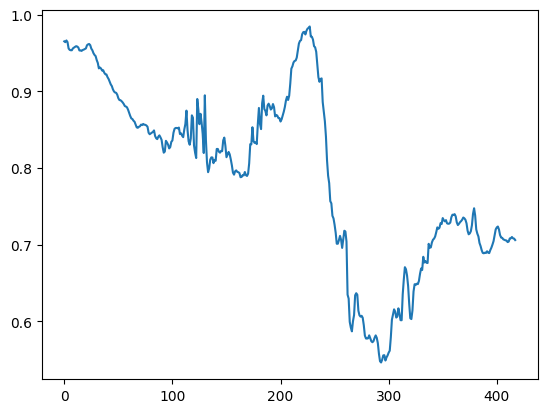

In [22]:
plt.plot(si['impact'])

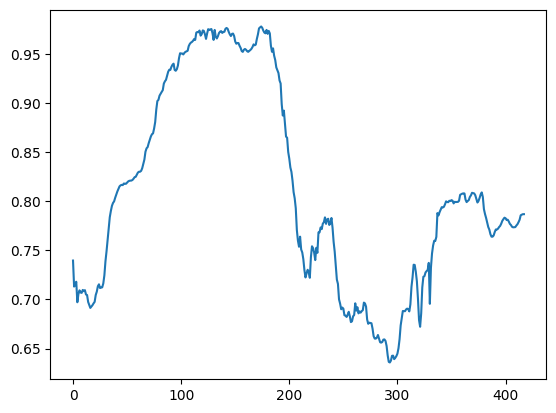

In [23]:
plt.plot(si['top'])

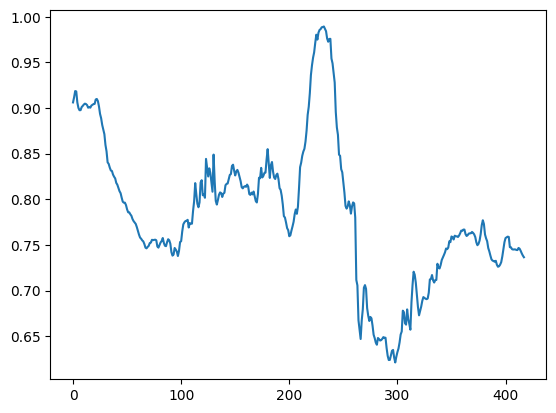

In [24]:
plt.plot(si['follow'])

In [62]:
cv2.imread('../utils_folder/pose_landmarks_reference.jpg').shape

(399, 626, 3)